# Tourism Classification
<img src='header.png' width='880'>

The dataset describes 24,675 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

Your goal is to accurately classify the range of expenditures a tourist spends in Tanzania.

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib . pyplot as plt
sns.set_style('darkgrid')
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette('Accent')
import plotly.express as px
import plotly.io as pio

In [160]:
df_dict = pd.read_csv('VariableDefinitions.csv')
TrainDF = pd.read_csv('Train.csv')
TestDF = pd.read_csv('Test.csv')

In [161]:
TrainDF.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [162]:
TestDF.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes
2,tour_idf6itml6g,ITALY,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Beach Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,No,Yes,No,No,No,0,6,Yes
3,tour_id99u4znru,KENYA,25-44,Alone,0.0,1.0,Other,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,4,No
4,tour_idj4i9urbx,ZAMBIA,25-44,Alone,0.0,1.0,Business,Widlife Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,6,0,No


In [163]:
df_dict

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [164]:
TrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

In [165]:
TrainDF.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,18504.000000,18500.000000,18506.000000,18506.000000
mean,0.936230,0.998757,9.141576,2.493516
std,1.215582,1.173177,14.127449,5.275156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000
75%,1.000000,1.000000,11.000000,4.000000
max,49.000000,58.000000,365.000000,240.000000


In [166]:
TrainDF.select_dtypes(['object']).describe().T

,count,unique,top,freq
Tour_ID,18506,18506,tour_id1hffseyw,1
country,18506,131,UNITED STATES OF AMERICA,2846
age_group,18506,5,25-44,9047
travel_with,17431,5,Alone,7590
purpose,18506,8,Leisure and Holidays,11755
main_activity,18506,10,Widlife Tourism,5988
info_source,18506,8,"Travel agent, tour operator",8005
tour_arrangement,18506,2,Package Tour,9295
package_transport_int,18506,2,No,12238
package_accomodation,18506,2,No,9541


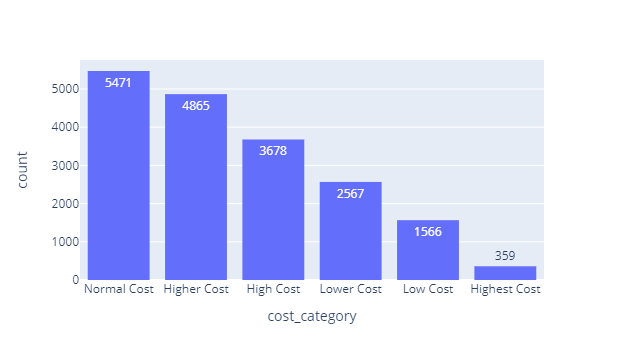

In [167]:
px.histogram(TrainDF,x='cost_category',text_auto=True).update_xaxes(categoryorder="total descending")

In [168]:
TrainDF.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

In [169]:
TestDF.isna().sum()

Tour_ID                    0
country                    0
age_group                  0
travel_with              361
total_female               2
total_male                 1
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
first_trip_tz              0
dtype: int64

<AxesSubplot:>

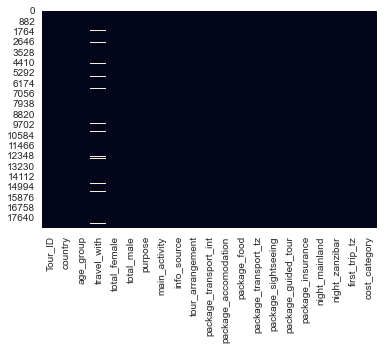

In [170]:
sns.heatmap(TrainDF.isna(), annot=False, cbar=False)

### handle missing data
let's fill this missing data in train and test set

In [171]:
def missingCols(df):
    df = df.isna().sum()
    return df[df>0]

In [172]:
missingCols(TrainDF)

travel_with     1075
total_female       2
total_male         6
dtype: int64

In [173]:
missingCols(TestDF)

travel_with     361
total_female      2
total_male        1
dtype: int64

In [174]:
df_dict[df_dict['Column Name'] == "travel_with"]['Definition'].values[0]

'The relation of people a tourist travel with to Tanzania'

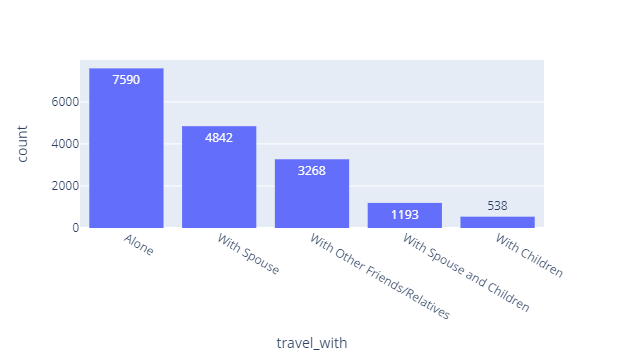

In [175]:
px.histogram(TrainDF,x='travel_with',text_auto=True).update_xaxes(categoryorder="total descending")

**we will fill this missing travel_with with an unknown**
but first let's explore the total female and total male missing

<AxesSubplot:xlabel='total_male'>

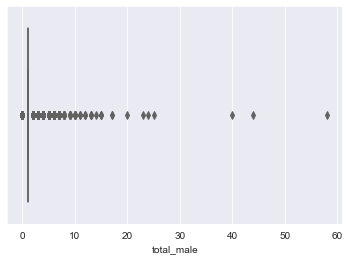

In [176]:
sns.boxplot(data = TrainDF, x ='total_male')

In [177]:
TrainDF[TrainDF['total_male'].isna()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
6195,tour_idcfe5lv3z,SOUTH AFRICA,25-44,With Other Friends/Relatives,0.0,NaN,Meetings and Conference,Wildlife Tourism,"Newspaper, magazines, brochures",Independent,...,No,No,No,No,No,No,4,0,Yes,Normal Cost
7092,tour_idzmkp9sq6,CHINA,25-44,With Other Friends/Relatives,10.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,4,2,Yes,Highest Cost
9350,tour_idgxm5bafr,SPAIN,45-64,With Other Friends/Relatives,7.0,NaN,Other,Hunting Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,Yes,11,0,No,Highest Cost
9571,tour_idaqxaa6li,FRANCE,25-44,NaN,0.0,NaN,Leisure and Holidays,Conference Tourism,"Radio, TV, Web",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,6,0,Yes,Normal Cost
13076,tour_id7rzn4czm,GERMANY,45-64,With Other Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,23,0,No,Higher Cost
15585,tour_id41dez9e2,NETHERLANDS,45-64,With Other Friends/Relatives,11.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,No,Yes,No,No,Yes,No,5,0,Yes,Higher Cost


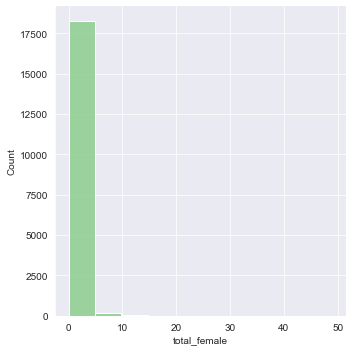

In [178]:
sns.displot(TrainDF['total_female'], bins=10)

In [179]:
TrainDF[TrainDF['total_female'].isna()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
7627,tour_idsgxazh59,FRANCE,25-44,With Other Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,9,5,Yes,Lower Cost
8388,tour_id1kmucs2v,ITALY,18-24,With Other Friends/Relatives,NaN,4.0,Volunteering,Wildlife Tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,15,0,Yes,High Cost


In [180]:
TrainDF['total_male'].median()

1.0

In [181]:
TrainDF['travel_with'] = TrainDF['travel_with'].fillna(value="unknown")
TrainDF['total_female'] = TrainDF['total_female'].fillna(value=TrainDF['total_female'].median())
TrainDF['total_male'] = TrainDF['total_male'].fillna(value=TrainDF['total_male'].median())

In [182]:
TestDF['travel_with'] = TestDF['travel_with'].fillna(value="unknown")
TestDF['total_female'] = TestDF['total_female'].fillna(value=TrainDF['total_female'].median())
TestDF['total_male'] = TestDF['total_male'].fillna(value=TrainDF['total_male'].median())

In [183]:
sum(TestDF.isna().sum())

0

#### Prepare Data

In [184]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [185]:
X = TrainDF.drop(['Tour_ID','cost_category'], axis=1)

#X_cat = X.select_dtypes(['object'])
#X_int = X.select_dtypes(exclude=['object'])

#X_cat = pd.get_dummies(X_cat, drop_first=True)
#X = pd.concat([X_cat, X_int], axis=1)

y = TrainDF['cost_category']


In [59]:
y = LabelEncoder().fit_transform(y)

In [60]:
encoder =OneHotEncoder(drop='first',sparse=False)
X = encoder.fit_transform(X)
scaler = StandardScaler()

In [61]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42, stratify=y)

In [64]:
#y_train.value_counts()

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Build a model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix

#### Logistic Regression

Accuracy fo model 55.70%


              precision    recall  f1-score   support

           0       0.48      0.36      0.41       368
           1       0.63      0.77      0.69       486
           2       0.22      0.06      0.09        36
           3       0.33      0.02      0.04       157
           4       0.55      0.58      0.57       257
           5       0.53      0.67      0.60       547

    accuracy                           0.56      1851
   macro avg       0.46      0.41      0.40      1851
weighted avg       0.53      0.56      0.52      1851





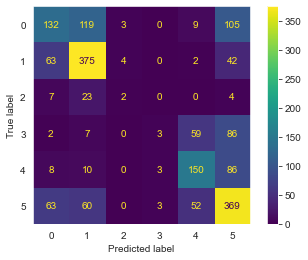

In [67]:
logistic_model = LogisticRegression( max_iter=500)

logistic_model.fit(X_train,y_train)

logistic_pred = logistic_model.predict(X_test)

print("Accuracy fo model {0:.2f}%".format(accuracy_score(y_test,logistic_pred)*100))

print("\n")

print(classification_report(y_test,logistic_pred))

print("\n")

plot_confusion_matrix(logistic_model,X_test,y_test)
plt.grid(None)

#### RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier

Accuracy fo model 54.62%


              precision    recall  f1-score   support

   High Cost       0.51      0.35      0.41       368
 Higher Cost       0.62      0.76      0.68       486
Highest Cost       0.00      0.00      0.00        36
    Low Cost       0.22      0.07      0.11       157
  Lower Cost       0.53      0.53      0.53       257
 Normal Cost       0.53      0.67      0.59       547

    accuracy                           0.55      1851
   macro avg       0.40      0.40      0.39      1851
weighted avg       0.51      0.55      0.52      1851





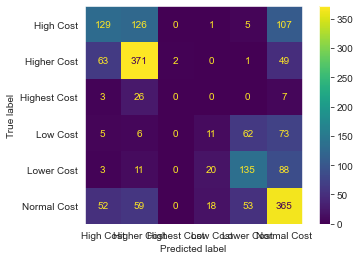

In [35]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

rf_pred = rf_model.predict(X_test)

print("Accuracy fo model {0:.2f}%".format(accuracy_score(y_test,rf_pred)*100))

print("\n")

print(classification_report(y_test,rf_pred))

print("\n")

plot_confusion_matrix(rf_model,X_test,y_test)
plt.grid(None)

#### SVC

In [36]:
from sklearn.svm import SVC

Accuracy fo model 55.32%


              precision    recall  f1-score   support

   High Cost       0.48      0.39      0.43       368
 Higher Cost       0.64      0.77      0.70       486
Highest Cost       0.00      0.00      0.00        36
    Low Cost       0.00      0.00      0.00       157
  Lower Cost       0.55      0.59      0.57       257
 Normal Cost       0.52      0.65      0.57       547

    accuracy                           0.55      1851
   macro avg       0.36      0.40      0.38      1851
weighted avg       0.49      0.55      0.52      1851





C:\Users\matty\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\matty\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\matty\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



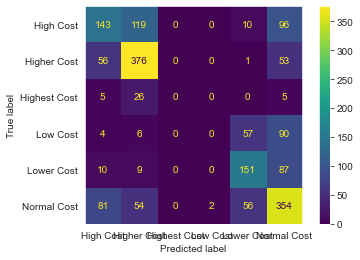

In [37]:
svc_model = SVC()

svc_model.fit(X_train,y_train)

sv_pred = svc_model.predict(X_test)

print("Accuracy fo model {0:.2f}%".format(accuracy_score(y_test,sv_pred)*100))

print("\n")

print(classification_report(y_test,sv_pred))

print("\n")

plot_confusion_matrix(svc_model,X_test,y_test)
plt.grid(None)

#### Xgboost

In [82]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [83]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y= y_train
)

In [84]:
Xg_model = XGBClassifier()

In [85]:
Xg_model.fit(X_train,y_train,sample_weight=sample_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

Accuracy fo model 50.41%


              precision    recall  f1-score   support

           0       0.46      0.44      0.45       368
           1       0.65      0.65      0.65       486
           2       0.23      0.53      0.32        36
           3       0.21      0.36      0.27       157
           4       0.55      0.53      0.54       257
           5       0.59      0.45      0.51       547

    accuracy                           0.50      1851
   macro avg       0.45      0.49      0.45      1851
weighted avg       0.53      0.50      0.51      1851





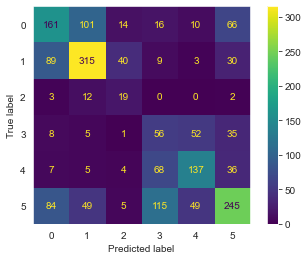

In [86]:
Xg_pred = Xg_model.predict(X_test)

print("Accuracy fo model {0:.2f}%".format(accuracy_score(y_test,Xg_pred)*100))

print("\n")

print(classification_report(y_test,Xg_pred))

print("\n")

plot_confusion_matrix(Xg_model,X_test,y_test)
plt.grid(None)

#### Build Full model | Prepare Data

In [281]:
print(TrainDF.shape)
print(TestDF.shape)

(18506, 22)
(6169, 21)


In [282]:
TrainDF['T'] = 1
TestDF['T'] = 0

In [283]:
fullDF = pd.concat([TrainDF,TestDF], axis=0)

In [284]:
fullDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24675 entries, 0 to 6168
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                24675 non-null  object 
 1   country                24675 non-null  object 
 2   age_group              24675 non-null  object 
 3   travel_with            24675 non-null  object 
 4   total_female           24675 non-null  float64
 5   total_male             24675 non-null  float64
 6   purpose                24675 non-null  object 
 7   main_activity          24675 non-null  object 
 8   info_source            24675 non-null  object 
 9   tour_arrangement       24675 non-null  object 
 10  package_transport_int  24675 non-null  object 
 11  package_accomodation   24675 non-null  object 
 12  package_food           24675 non-null  object 
 13  package_transport_tz   24675 non-null  object 
 14  package_sightseeing    24675 non-null  object 
 15  pac

In [285]:
#fullDF.drop(['Tour_ID','cost_category'],axis=1)

In [286]:
encoderF =OneHotEncoder(drop='first',sparse=False)
temp = fullDF.drop(['Tour_ID','cost_category'],axis=1).copy()
encoderF.fit(temp)
newFullDF = encoderF.transform(temp)

In [287]:
finalDF = pd.DataFrame(newFullDF, columns=encoderF.get_feature_names(temp.columns))

In [288]:
finalDF.head()

,country_ALGERIA,country_ANGOLA,country_ARGENTINA,country_ARMENIA,country_AUSTRALIA,country_AUSTRIA,country_BAHRAIN,country_BANGLADESH,country_BARBADOS,country_BELARUS,...,night_zanzibar_90,night_zanzibar_91,night_zanzibar_100,night_zanzibar_107,night_zanzibar_108,night_zanzibar_120,night_zanzibar_174,night_zanzibar_240,first_trip_tz_Yes,T_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [289]:
final_Train = finalDF[finalDF['T_1'] == 1].copy()
final_Test = finalDF[finalDF['T_1'] == 0].copy()
del final_Train['T_1']
del final_Test['T_1']
del temp
del TrainDF['T']
del TestDF['T']

In [290]:
final_Train['cost_category'] = fullDF[fullDF['T']==1]['cost_category']

<ipython-input-290-c64cbbda89e5>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [291]:
print(final_Test.shape)
print(final_Train.shape)

(6169, 413)
(18506, 414)


In [292]:
print(sum(final_Train.isna().sum()))
print(sum(final_Test.isna().sum()))

0
0


##### Scale final Data

In [307]:
scalerF = StandardScaler()

In [308]:
FX_train = final_Train.drop('cost_category', axis=1).copy()
Fy_train = final_Train['cost_category']

le = LabelEncoder()
Fy_train = le.fit_transform(Fy_train)


FX_train = scalerF.fit_transform(FX_train)
FX_test = scalerF.transform(final_Test)


Fsample_weights = compute_sample_weight(
    class_weight='balanced',
    y= Fy_train
)

##### xgF

In [309]:
FXg_model = XGBClassifier()

In [310]:
FXg_model.fit(FX_train,Fy_train,sample_weight=Fsample_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [311]:
FXg_pred = FXg_model.predict(FX_test)

In [312]:
FXg_pred

array([5, 1, 0, ..., 0, 5, 4], dtype=int64)

In [314]:
FXg_model.predict_proba(FX_test)

array([0.09649094, 0.01472198, 0.00291975, 0.19440216, 0.03217449,
       0.6592907 ], dtype=float32)

In [327]:
submit_pred = pd.DataFrame(FXg_model.predict_proba(FX_test), columns=le.classes_)

In [328]:
submit_pred.head()

,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
0,0.096491,0.014722,0.002920,0.194402,0.032174,0.659291
1,0.169831,0.702327,0.039119,0.014850,0.010173,0.063701
2,0.585979,0.245129,0.020468,0.043533,0.005678,0.099214
3,0.011549,0.005514,0.000697,0.676506,0.105148,0.200585
4,0.032432,0.006618,0.000910,0.376768,0.326483,0.256790


In [324]:
#submit_pred['Tour_ID'] = TestDF['Tour_ID']

In [329]:
submit_pred.insert(0,'Tour_ID',TestDF['Tour_ID'] )

In [330]:
submit_pred.head()

,Tour_ID,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
0,tour_idynufedne,0.096491,0.014722,0.002920,0.194402,0.032174,0.659291
1,tour_id9r3y5moe,0.169831,0.702327,0.039119,0.014850,0.010173,0.063701
2,tour_idf6itml6g,0.585979,0.245129,0.020468,0.043533,0.005678,0.099214
3,tour_id99u4znru,0.011549,0.005514,0.000697,0.676506,0.105148,0.200585
4,tour_idj4i9urbx,0.032432,0.006618,0.000910,0.376768,0.326483,0.256790


In [331]:
submit_pred.to_csv('submissionXG.csv', index=False)